In [252]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sbs
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

import numpy as np
import pandas as pd

In [307]:
arr = np.zeros((100, 5))
for num in range(0,99):
    a = 1 if (np.random.rand() >= 0.3) else 0             #   -> a - 70 %
    b = 1 if (np.random.rand() >= 0.5 and a == 1) else 0  # a -> b - 50 %
    c = 1 if (np.random.rand() >= 0.5 and b == 1) else 0  # b -> c - 50 %
    d = 1 if (b == 1 and c == 0) else 0                   # b -> d - 50 % (neg. c)
    e = 1 if (np.random.rand() >= 0.7) else 0             #   -> e - 30 % 
    
    # c |= 1 if (np.random.rand() >= 0.9) else 0            #   -> c - 10 % (+ Rauschen)    
    arr[num] = [a, b, c, d, e]
    
df = pd.DataFrame(arr, columns=['a','b','c','d','e'])

[]

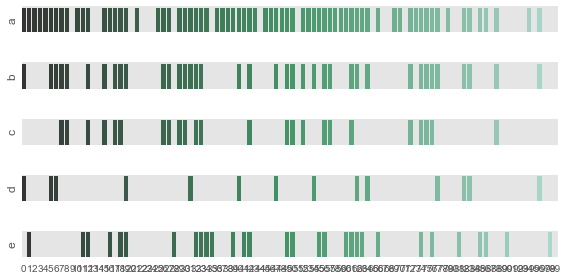

In [308]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(8, 4), sharex=True)

def plotl(axis, label):
    sbs.barplot(df.index, df[label], palette="BuGn_d", ax=axis);
    axis.set_ylabel(label);
    
plotl(ax1, 'a')
plotl(ax2, 'b')
plotl(ax3, 'c')
plotl(ax4, 'd')
plotl(ax5, 'e')

sbs.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)


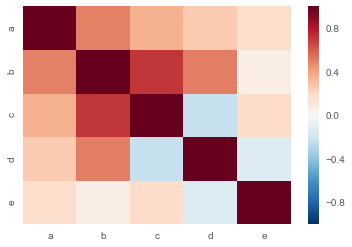

In [309]:
sbs.heatmap(df.corr());

In [310]:
df.sum()

a    71.0
b    38.0
c    24.0
d    14.0
e    30.0
dtype: float64

In [311]:
# remove events without dependency
for num in range(0,100):
    if (arr[num].sum() == 1):
        arr[num] = np.zeros(5)

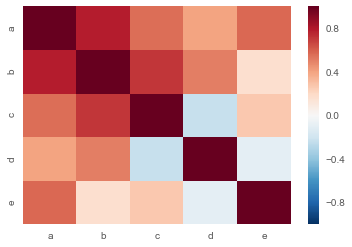

In [312]:
sbs.heatmap(df.corr());

In [313]:
df.sum()

a    50.0
b    38.0
c    24.0
d    14.0
e    25.0
dtype: float64